In [8]:
import numpy as np
import generatorTool as gt
import matplotlib.pyplot as plt

k = 2.0
L1 = 0.6+0.5+0.5 # the total drift of L1+L2+L3 in the paper, as we are not considering the quads
L2 = 0.5 # random drift for between the spectrometer and Position B

thet = np.pi/3 # 18 deg at AWA
rho = 3
yp = 1
delta = 2

n = 100000 # number of macroparticles
lorentz_fac = 95.16

nsigma = 2
alphax = 1.1
alphay = 1.2
betax = 49.9
betay = 50.9
norm_emitx = 26.4*10**-6
norm_emity = 26*10**-6

emitgeomx = norm_emitx/lorentz_fac
emitgeomy = norm_emity/lorentz_fac

def drift(L):
    return ([1, L, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, L, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1])
tdc = ([1, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0],
      [0, 0, 0, 1, k, 0],
      [0, 0, 0, 0, 1, 0],
      [0, 0, k, 0, 0, 1])
dipole = ([np.cos(thet), rho*np.sin(thet), 0, 0, 0, rho*(1-np.cos(thet))],
         [-np.sin(thet)/rho, np.cos(thet), 0, 0, 0, np.sin(thet)],
         [0, 0, 1, rho*thet, 0, 0],
         [0, 0, 0, 1, 0, 0],
         [-np.sin(thet), rho*(np.cos(thet)-1), 0, 0, 1, rho*(np.sin(thet)-thet)],
         [0, 0, 0, 0, 0, 1])

tdc2drift = np.dot(drift(L1),tdc)
spec2B = np.dot(drift(L2),dipole)
TDCoff = np.dot(dipole,drift(L1))
fulloff = np.dot(drift(L2),TDCoff)
full = np.dot(spec2B,tdc2drift)

100000


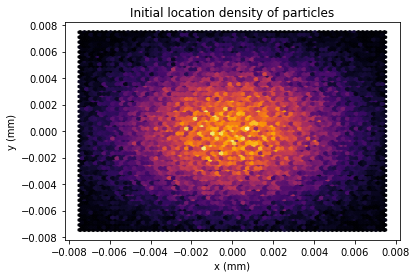

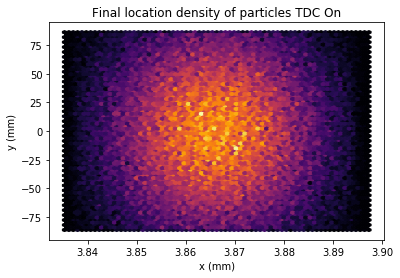

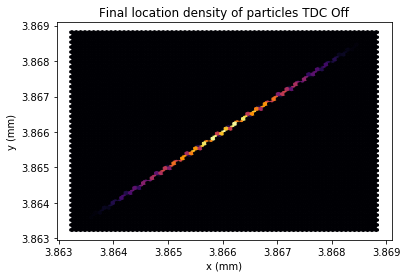

In [10]:
xstart, xp, ystart, yp = gt.gaussian_phase_space_2dof(n, alphax, betax, emitgeomx,\
                                                     alphay, betay, emitgeomy, nsigma)

mu,sigma = 0, 6

def normal_dist(x, mean, sd):
    prob_density = (np.pi*sd)*np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

startz = np.linspace(-10,10,9000)

zmean = np.mean(startz)
zsd = np.std(startz)

zstartnd = normal_dist(startz,zmean,zsd)
zstart = [[startz[i]]*int(round(zstartnd[i])) for i in np.arange(len(zstartnd))]
zstart = [item for sublist in zstart for item in sublist]
zstart = zstart[int(len(zstart)/2-len(xstart)/2):int(len(zstart)/2+len(xstart)/2)]
print(len(zstart))

xf = []
yf = []
zf = []
xfoff = []
yfoff = []
zfoff = []

for i in np.arange(len(xstart)):
    xi = xstart[i]
    yi = ystart[i]
    zi = zstart[i]
    xpi = xp[i]
    ypi = yp[i]
    startfull = [xi,xpi,yi,ypi,zi,delta]
    endingoff = np.dot(fulloff,startfull)
    ending = np.dot(full,startfull)
    xf.append(ending[0])
    yf.append(ending[2])
    zf.append(ending[4])
    xfoff.append(endingoff[0])
    yfoff.append(endingoff[0])
    zfoff.append(endingoff[0])

#print('Number of start particles (x, y, z): ',len(xstart),len(ystart),len(zstart))
#print('Number of end particles (x, y, z): ',len(xf),len(yf),len(zf))


plt.hexbin(xstart, ystart, gridsize=70, cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Initial location density of particles')
plt.show()

plt.hexbin(xf, yf, gridsize=70, cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Final location density of particles TDC On')
plt.show()

plt.hexbin(xfoff, yfoff, gridsize=70, cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Final location density of particles TDC Off')
plt.show()